In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib
os.chdir(r'C:\aa_sem_i\PiPG_I\temat_2\dane_wejsciowe')

## Oczyszczenie i wczytanie danych

In [2]:
import re
def my_replace(s,character=', '):
    '''Replace all runs of whitespace with a single dash'''
    
    s = re.sub("\s+", character, s)
    return s

def readfile(input_path,value_starts,output_path):
    '''reading from input_path, checking initial value_starts and writing this line to output_path '''

    with open(input_path,'r') as r, open(output_path, 'w') as w:
        for line in r:
            wart = my_replace(line).split(',')
            if wart[0] == value_starts:
                w.writelines(wart+['\n'])

# Dane o c 3
readfile('glonass.txt','PR08', 'glo_out.txt')
readfile('gps.txt','PG08', 'gps_out.txt')

glo_data = np.loadtxt('glo_out.txt', usecols=(1,2,3))
gps_data = np.loadtxt('gps_out.txt', usecols=(1,2,3))

# Dane do c 4
readfile('glonass.txt','*', 'glo_time.txt')
readfile('gps.txt','*', 'gps_time.txt')

glo_time = np.loadtxt('glo_time.txt', usecols=[x for x in range(4,7)])
gps_time = np.loadtxt('gps_time.txt', usecols=[x for x in range(4,7)])

s_glo = glo_time[:,0] * 3600 + glo_time[:,1] * 60 + glo_time[:,2]
s_gps = gps_time[:,0] * 3600 + gps_time[:,1] * 60 + gps_time[:,2]

## Obliczenia ćwiczenie 3

In [3]:

def obl(data):

    ro = 180/np.pi
    x,y,z = data[:,0],data[:,1],data[:,2]

    p = np.sqrt(x*x+y*y)
    fi = ro*np.arctan2(z,p)
    la = ro*np.arctan2(y,x)
    
    return p,fi,la

p_glo,fi_glo, la_glo = obl(glo_data)
p_gps,fi_gps, la_gps = obl(gps_data)

### Rysowanie wykresu c3

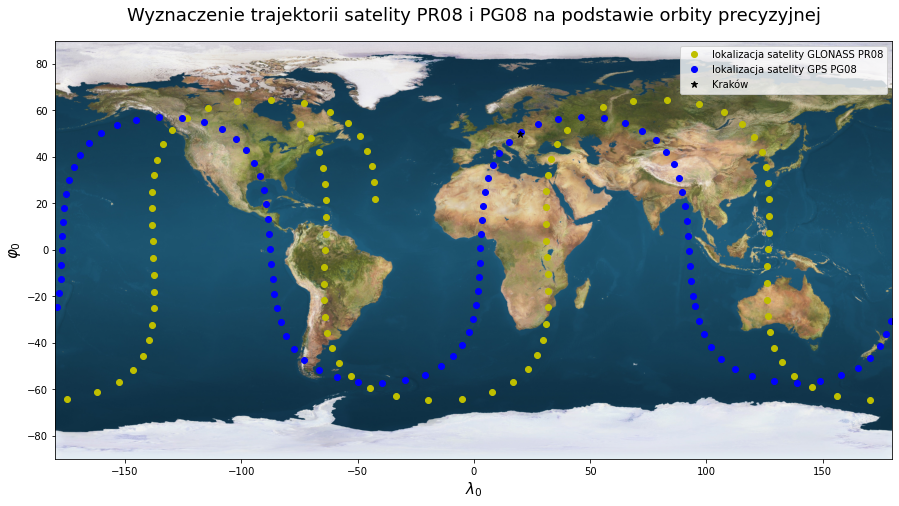

In [4]:
img = plt.imread('_earth.jpg')

plt.figure(figsize=(15,10))
plt.title('Wyznaczenie trajektorii satelity PR08 i PG08 na podstawie orbity precyzyjnej',fontsize = 18, pad = 20)
plt.xlabel('$λ_0$',fontsize = 15)
plt.ylabel('$φ_0$', fontsize = 15)
#skalowanie tla
plt.imshow(img, extent=(-180,180,-90,90))
#trajektoria satelity i miejscowosc
plt.plot(la_glo, fi_glo, 'oy', label = 'lokalizacja satelity GLONASS PR08')
plt.plot(la_gps, fi_gps, 'ob', label = 'lokalizacja satelity GPS PG08')
plt.plot(20,50, '*k', label = 'Kraków',markersize = 7)
plt.legend()
#plt.show()
plt.savefig(r'C:\aa_sem_i\PiPG_I\temat_2\dane_przetworzone\Daniel_Cienkosz.jpg', dpi = 200)


## Obliczenia c4

In [5]:
def obl_c4(data, time):
    ro = 180/np.pi
    x,y,z = data[:,0],data[:,1],data[:,2]
    
    omega_e = 7.292115*10**(-5)
    omega = omega_e*time
    x_qi = x*np.cos(omega)-y*np.sin(omega)
    y_qi = x*np.sin(omega)+y*np.cos(omega)
    
    return x_qi, y_qi, z

x_qi_glo, y_qi_glo, z_glo = obl_c4(glo_data, s_glo)
x_qi_gps, y_qi_gps, z_gps = obl_c4(gps_data, s_gps)

<IPython.core.display.Javascript object>


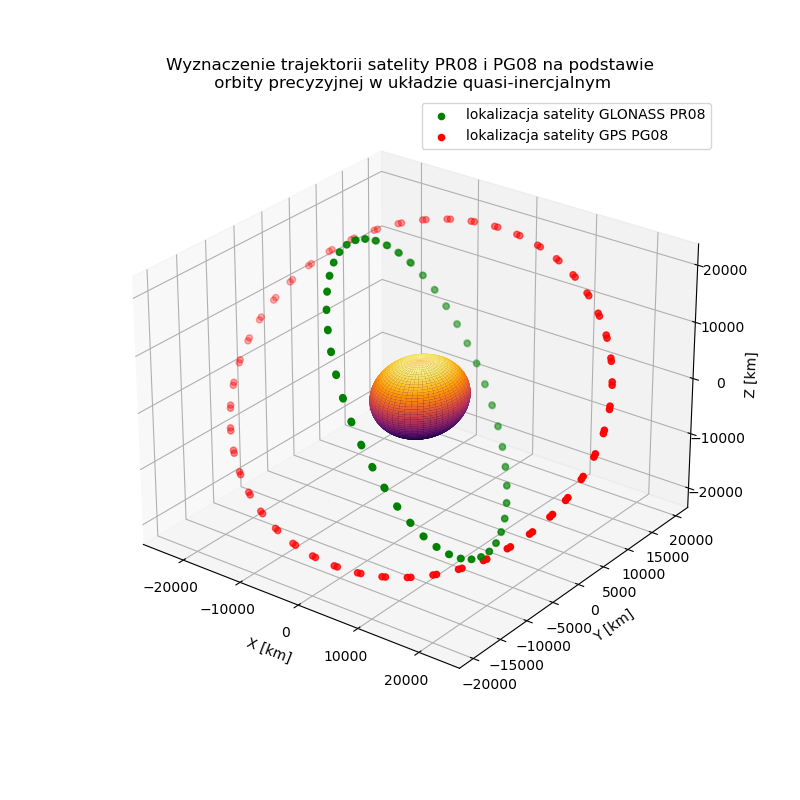

[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]


In [40]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = "3d")

# Make data.
X_glo = x_qi_glo
Y_glo = y_qi_glo
Z_glo = z_glo

X_gps = x_qi_gps
Y_gps = y_qi_gps
Z_gps = z_gps

ax.scatter(Y_glo, X_glo, Z_glo, marker = 'o',color = 'g', label = 'lokalizacja satelity GLONASS PR08')
ax.scatter(Y_gps, X_gps, Z_gps, marker = 'o', color = 'r', label = 'lokalizacja satelity GPS PG08')

u = np.linspace(0, 2*np.pi, 50, )
v = np.linspace(0, np.pi, 50)
x = 6371 * np.outer(np.cos(u), np.sin(v))
y = 6371 * np.outer(np.sin(u), np.sin(v))
z = 6356 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, cmap = 'inferno')

ax.legend()
ax.set(xlabel = "X [km]", ylabel = "Y [km]", zlabel = "Z [km]")
plt.title('Wyznaczenie trajektorii satelity PR08 i PG08 na podstawie\n orbity precyzyjnej w układzie quasi-inercjalnym')
plt.savefig(r'C:\aa_sem_i\PiPG_I\temat_2\dane_przetworzone\c_4_Daniel_Cienkosz.jpg', dpi = 80)
plt.show()